In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
text = """
     1.	lettr	capital letter	(26 values from A to Z)
	 2.	x-box	horizontal position of box	(integer)
	 3.	y-box	vertical position of box	(integer)
	 4.	width	width of box			(integer)
	 5.	high 	height of box			(integer)
	 6.	onpix	total # on pixels		(integer)
	 7.	x-bar	mean x of on pixels in box	(integer)
	 8.	y-bar	mean y of on pixels in box	(integer)
	 9.	x2bar	mean x variance			(integer)
	10.	y2bar	mean y variance			(integer)
	11.	xybar	mean x y correlation		(integer)
	12.	x2ybr	mean of x * x * y		(integer)
	13.	xy2br	mean of x * y * y		(integer)
	14.	x-ege	mean edge count left to right	(integer)
	15.	xegvy	correlation of x-ege with y	(integer)
	16.	y-ege	mean edge count bottom to top	(integer)
	17.	yegvx	correlation of y-ege with x	(integer)
"""

column_names = re.findall(r'\s+\d+\.\s+([^\t]+)', text)
print(column_names)

['lettr', 'x-box', 'y-box', 'width', 'high ', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']


In [14]:
df = pd.read_csv('letter_recognition.data', names=column_names)
df.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [15]:
X = df.drop(columns=['lettr'])
y = df['lettr']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
model1 = DecisionTreeClassifier(criterion='gini')
model1.fit(X_train, y_train)

model2 = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.015)
model2.fit(X_train, y_train)

model3 = DecisionTreeClassifier(criterion='entropy')
model3.fit(X_train, y_train)

model4 = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.015)
model4.fit(X_train, y_train)

In [19]:
y_pred1 = model1.predict(X_test)
train_acc1 = model1.score(X_train, y_train)
test_acc1 = accuracy_score(y_test, y_pred1)

y_pred2 = model2.predict(X_test)
train_acc2 = model2.score(X_train, y_train)
test_acc2 = accuracy_score(y_test, y_pred2)

y_pred3 = model3.predict(X_test)
train_acc3 = model3.score(X_train, y_train)
test_acc3 = accuracy_score(y_test, y_pred3)

y_pred4 = model4.predict(X_test)
train_acc4 = model4.score(X_train, y_train)
test_acc4 = accuracy_score(y_test, y_pred4)

print(f'Using Gini without pruning:\nTraining Accuracy: {train_acc1}\nTesting Accuracy: {test_acc1}\n')
print(f'Using Gini with pruning:\nTraining Accuracy: {train_acc2}\nTesting Accuracy: {test_acc2}\n')
print(f'Using Entropy without pruning:\nTraining Accuracy: {train_acc3}\nTesting Accuracy: {test_acc3}\n')
print(f'Using Entropy with pruning:\nTraining Accuracy: {train_acc4}\nTesting Accuracy: {test_acc4}')

Using Gini without pruning:
Training Accuracy: 1.0
Testing Accuracy: 0.88275

Using Gini with pruning:
Training Accuracy: 0.302625
Testing Accuracy: 0.29175

Using Entropy without pruning:
Training Accuracy: 1.0
Testing Accuracy: 0.887

Using Entropy with pruning:
Training Accuracy: 0.60275
Testing Accuracy: 0.60175


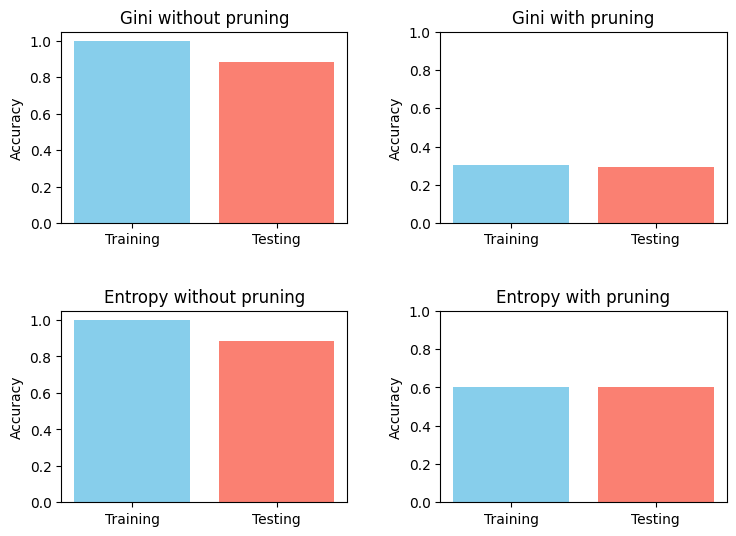

In [24]:
labels = ['Training', 'Testing']

plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
plt.bar(labels, [train_acc1, test_acc1], color=['skyblue', 'salmon'])
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.ylabel('Accuracy')
plt.title('Gini without pruning')

plt.subplot(2, 2, 2)
plt.bar(labels, [train_acc2, test_acc2], color=['skyblue', 'salmon'])
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.ylabel('Accuracy')
plt.title('Gini with pruning')

plt.subplot(2, 2, 3)
plt.bar(labels, [train_acc3, test_acc3], color=['skyblue', 'salmon'])
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.ylabel('Accuracy')
plt.title('Entropy without pruning')

plt.subplot(2, 2, 4)
plt.bar(labels, [train_acc4, test_acc4], color=['skyblue', 'salmon'])
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.ylabel('Accuracy')
plt.title('Entropy with pruning')

plt.tight_layout(pad=3)
plt.show()